In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"/Users/priyankamalavade/Desktop/Customer_Segmentation_Sales_Analytics/data/raw/data.csv", encoding='ISO-8859-1')
print("Dataset shape:", data.shape)
data.head()

Dataset shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
print(data.info())
print("\nMissing values per column:\n", data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

Missing values per column:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [4]:
data = data.dropna(subset=['CustomerID'])


In [5]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['CustomerID'] = data['CustomerID'].astype(str)


In [6]:
data = data[~data['InvoiceNo'].astype(str).str.startswith('C')]


In [7]:
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']


In [8]:
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]


In [9]:
cleaned_path = "/Users/priyankamalavade/Desktop/Customer_Segmentation_Sales_Analytics/data/processed/cleaned_data.csv"
data.to_csv(cleaned_path, index=False)
print(f"Cleaned data saved to {cleaned_path}")


Cleaned data saved to /Users/priyankamalavade/Desktop/Customer_Segmentation_Sales_Analytics/data/processed/cleaned_data.csv


In [10]:
print("\nTotal Revenue:", round(data['TotalAmount'].sum(), 2))
print("Unique Customers:", data['CustomerID'].nunique())
print("Countries:", data['Country'].nunique())



Total Revenue: 8911407.9
Unique Customers: 4338
Countries: 37


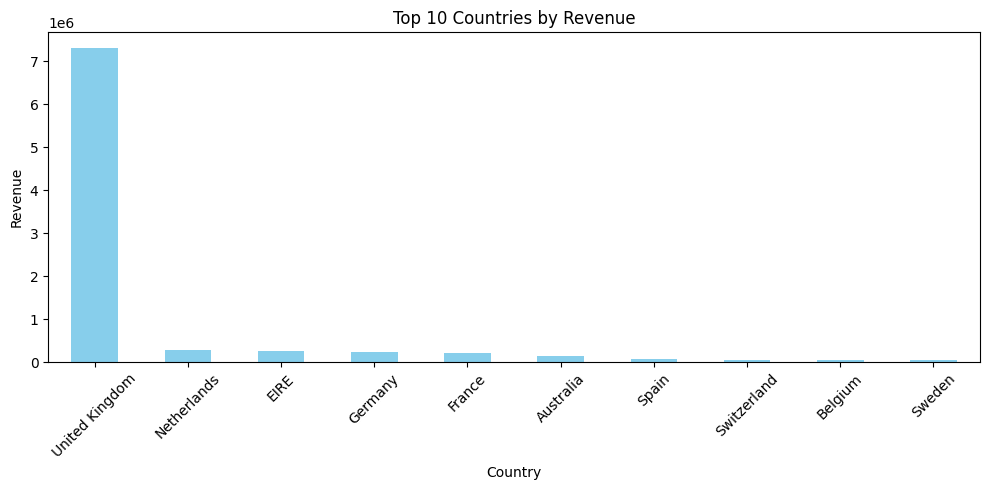

In [11]:
country_revenue = data.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
country_revenue.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

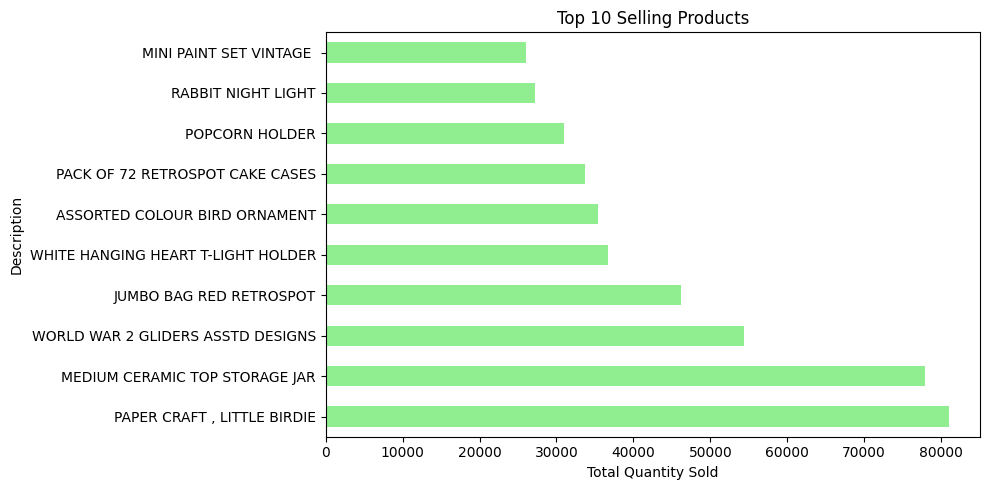

In [12]:
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_products.plot(kind='barh', color='lightgreen')
plt.title("Top 10 Selling Products")
plt.xlabel("Total Quantity Sold")
plt.tight_layout()
plt.show()